# Machine Learning Foundation

## Section 1, Part a: Reading Data 

### Learning Objective(s)

 - Create a SQL database connection to a sample SQL database, and read records from that database
 - Explore common input parameters

### Packages

 - [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
 - [Pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)
 - [SQLite3](https://docs.python.org/3.6/library/sqlite3.html)

## Simple data reads

Structured Query Language (SQL) is an [ANSI specification](https://docs.oracle.com/database/121/SQLRF/ap_standard_sql001.htm#SQLRF55514), implemented by various databases. SQL is a powerful format for interacting with large databases efficiently, and SQL allows for a consistent experience across a large market of databases. We'll be using sqlite, a lightweight and somewhat restricted version of sql for this example. sqlite uses a slightly modified version of SQL, which may be different than what you're used to. 

In [1]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


### Database connections

Our first step will be to create a connection to our SQL database. A few common SQL databases used with Python include:

 - Microsoft SQL Server
 - Postgres
 - MySQL
 - AWS Redshift
 - AWS Aurora
 - Oracle DB
 - Terradata
 - Db2 Family
 - Many, many others
 
Each of these databases will require a slightly different setup, and may require credentials (username & password), tokens, or other access requirements. We'll be using `sqlite3` to connect to our database, but other connection packages include:

 - [`SQLAlchemy`](https://www.sqlalchemy.org/) (most common)
 - [`psycopg2`](http://initd.org/psycopg/)
 - [`MySQLdb`](http://mysql-python.sourceforge.net/MySQLdb.html)

In [3]:
# Initialize path to SQLite database
path = 'data/classic_rock.db'
con = sq3.Connection(path)

# We now have a live connection to our SQL database

### Reading data

Now that we've got a connection to our database, we can perform queries, and load their results in as Pandas DataFrames

In [4]:
# Write the query
query = '''
SELECT * 
FROM rock_songs;
'''

# Execute the query
df = pds.read_sql(query, con)

df.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13


In [5]:
# We can also run any supported SQL query
# Write the query
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(), observations.shape

(         Artist  Release_Year  num_songs  avg_plays
 0   The Beatles        1967.0         23   6.565217
 1  Led Zeppelin        1969.0         18  21.000000
 2   The Beatles        1965.0         15   3.800000
 3   The Beatles        1968.0         13  13.000000
 4   The Beatles        1969.0         13  15.000000,
 (908, 4))

## Common parameters

There are a number of common paramters that can be used to read in SQL data with formatting:

 - coerce_float: Attempt to force numbers into floats
 - parse_dates: List of columns to parse as dates
 - chunksize: Number of rows to include in each chunk
 
Let's have a look at using some of these parameters

In [ ]:
# query='''
# SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
#     FROM rock_songs
#     GROUP BY Artist, Release_Year
#     ORDER BY num_songs desc;
# '''

# # Execute the query
# observations_generator = pds.read_sql(query,
#                             con,
#                             coerce_float=True, # Doesn't efefct this dataset, because floats were correctly parsed
#                             parse_dates=['Release_Year'], # Parse `Release_Year` as a date
#                             chunksize=5 # Allows for streaming results as a series of shorter tables
#                            )
# for index, observations in enumerate(observations_generator):
#     if index < 5:
#         print(f'Observations index: {index}'.format(index))
#         display(observations)

In [6]:
df.shape, df.dtypes

((1650, 4),
 Song             object
 Artist           object
 Release_Year    float64
 PlayCount         int64
 dtype: object)

In [7]:
df.columns

Index(['Song', 'Artist', 'Release_Year', 'PlayCount'], dtype='object')

In [8]:
df.isnull().sum()

Song            0
Artist          0
Release_Year    0
PlayCount       0
dtype: int64

In [9]:
[(f"Total unique data in {unique_object}'s Column'",df[unique_object].nunique()) for unique_object in df[["Song","Artist"]]]

[("Total unique data in Song's Column'", 1621),
 ("Total unique data in Artist's Column'", 385)]

In [10]:
by_releaseYear=df.groupby("Release_Year") 
by_releaseYear.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13
...,...,...,...,...
1429,Iris,The Goo Goo Dolls,1998.0,2
1491,Seven Nation Army,The White Stripes,2003.0,1
1519,Get Together,The Youngbloods,2005.0,2
1556,Beautiful Day,U2,2000.0,7


In [11]:
by_Artist = df.groupby("Artist")
by_Artist.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13
...,...,...,...,...
1635,Arrested For Driving While Blind,ZZ Top,1976.0,1
1636,Beer Drinkers & Hell Raisers,ZZ Top,1973.0,8
1637,Cheap Sunglasses,ZZ Top,1980.0,34
1638,Gimme All Your Lovin,ZZ Top,1983.0,86


In [12]:
df.corr()

C:\Users\Aabha khatiwada\AppData\Local\Temp\ipykernel_13184\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Release_Year,PlayCount
Release_Year,1.00000,-0.07396
PlayCount,-0.07396,1.00000


In [13]:
df.Release_Year.unique()

array([1982., 1981., 1980., 1975., 2000., 2002., 1992., 1985., 1993.,
       1976., 1995., 1979., 1984., 1977., 1990., 1986., 1974., 2014.,
       1987., 1973., 2001., 1989., 1997., 1971., 1972., 1994., 1970.,
       1966., 1965., 1983., 1955., 1978., 1969., 1999., 1968., 1988.,
       1962., 2007., 1967., 1958., 1996., 1991., 2005., 2011., 2004.,
       2012., 2003., 1998., 2008., 1964., 2013., 2006., 1963., 1961.])

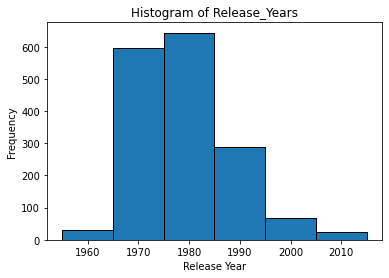

In [14]:

df["Release_Year"]=pd.to_datetime(df["Release_Year"], format='%Y').dt.year
# create bins with a range of 10 years
bins = range(df['Release_Year'].min(), df['Release_Year'].max()+10, 10)

# create the histogram
plt.hist(df['Release_Year'], bins=bins, edgecolor='black')

# set the title and labels
plt.title('Histogram of Release_Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')

# show the plot
plt.show()

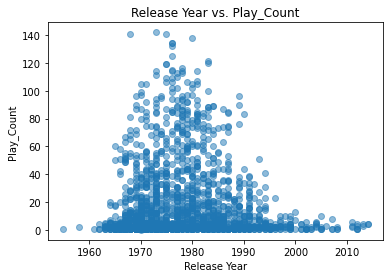

In [15]:
plt.scatter(df['Release_Year'], df['PlayCount'], alpha=0.5,color)

# set the title and labels
plt.title('Release Year vs. Play_Count')
plt.xlabel('Release Year')
plt.ylabel('Play_Count')

# show the plot
plt.show()

In [17]:
df.groupby(["Release_Year","Artist"])["PlayCount"].describe()

count  mean       std  min   25%  50%  \
Release_Year Artist                                                          
1955         Bill Haley                1.0   1.0       NaN  1.0  1.00  1.0   
1958         Chuck Berry               1.0   2.0       NaN  2.0  2.00  2.0   
1961         The Beatles               1.0   1.0       NaN  1.0  1.00  1.0   
1962         Booker T. and the MG's    1.0   4.0       NaN  4.0  4.00  4.0   
             The Beatles               2.0   1.0  0.000000  1.0  1.00  1.0   
...                                    ...   ...       ...  ...   ...  ...   
2012         Kid Rock                  1.0   1.0       NaN  1.0  1.00  1.0   
             Rolling Stones            1.0   1.0       NaN  1.0  1.00  1.0   
2013         Pearl Jam                 2.0   3.5  0.707107  3.0  3.25  3.5   
2014         Adelitas Way              1.0   4.0       NaN  4.0  4.00  4.0   
             Chevelle                  1.0   4.0       NaN  4.0  4.00  4.0   

                                      75%  max  
Release_Year Artist                             
1955         Bill Haley              1.00  1.0  
1958         Chuck Berry             2.00  2.0  
1961         The Beatles             1.00  1.0  
1962         Booker T. and the MG's  4.00  4.0  
             The Beatles             1.00  1.0  
...                                   ...  ...  
2012         Kid Rock                1.00  1.0  
             Rolling Stones          1.00  1.0  
2013         Pearl Jam               3.75  4.0  
2014         Adelitas Way            4.00  4.0  
             Chevelle                4.00  4.0  

[908 rows x 8 columns]

C:\Users\Aabha khatiwada\AppData\Local\Temp\ipykernel_13184\2341491654.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5, annot_kws={"size": 12}, fmt='.2f')


<AxesSubplot:>

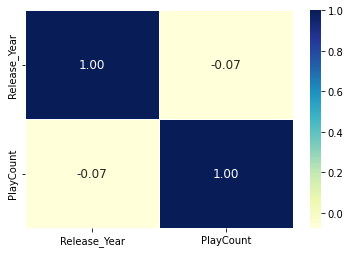

In [19]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5, annot_kws={"size": 12}, fmt='.2f')

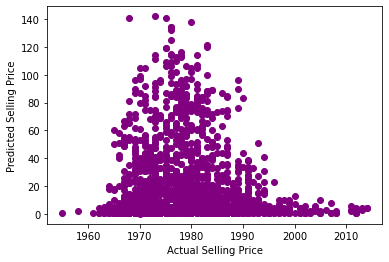

In [22]:
# Plot the actual target values against the predicted values
plt.scatter(df["Release_Year"], df["PlayCount"], color='purple')

# Plot a line for the perfect prediction
# plt.plot([yTrain.min(), yTrain.max()], [yTrain.min(), yTrain.max()], lw=2, color='red')

# Set the labels for the x and y axes
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

# Show the plot
plt.show()

### Machine Learning Foundation (C) 2020 IBM Corporation